# Cross validation

### 1$-$ [KFold](#kfold)

### 2$-$ [ShuffleSplit](#shufflesplit)

### 3$-$ [StratifiedKFold](#stratifiedkfold)

### 4$-$ [GroupKFold](#groupkfold)

## Iris flower data set

dataset size:  (150, 4)


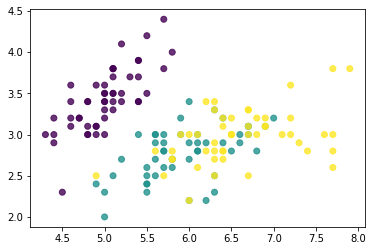

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Dataset
iris = load_iris()
X, y = iris.data, iris.target
print("dataset size: ", X.shape)

# plot the dataset
_ = plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

<a name="kfold"></a>
## 1$-$ KFold

**It is the best known and simple cross validation strategy**

**Steps:**
>$-$ Split the dataset into $k$ equal folds. \
>$-$ At each iteration, the model is trained on $k-1$ folds and is tested on the remaining fold.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Create a classification model
model = KNeighborsClassifier()

# k-fold cross validation
cv = KFold(5, shuffle=True, random_state=0)
cross_val_score(model, X, y, cv=cv)

array([0.96666667, 0.9       , 1.        , 1.        , 0.93333333])

### $\blacktriangleright$ Leave One Out

**In this special case, the number of splits (folds) is equal to 
the number of samples we have in our train-set.**

In [3]:
from sklearn.model_selection import LeaveOneOut

# Leave One Out cross validation
cv = LeaveOneOut()
cross_val_score(model, X, y, cv=cv)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

<a name="shufflesplit"></a>
## 2$-$ ShuffleSplit


**repeat** as many times as we want with the same `proportion`:
>1. `Shuffle` the dataset.
    >2. $-$ `Define` a portion (%) for the `test` (validation),\
     $-$ `Define` a portion (%) for `training`.
>3. `Training` and `evaluates` the model.
>4. `Regroup` the dataset again


In [4]:
from sklearn.model_selection import ShuffleSplit

# Create a classification model
model = KNeighborsClassifier()

# k-fold cross validation
cv = ShuffleSplit(5, test_size=0.2)
cross_val_score(model, X, y, cv=cv)

array([1.        , 1.        , 1.        , 0.96666667, 0.93333333])

<a name="stratifiedkfold"></a>
## 3$-$ StratifiedKFold

**for solving the problem of unbalanced classes we will use the `StratifiedKFold` method**

<br>

<div style="display:flex;">
    <div style="width:100px"> Dataset: </div>
    <div style="color:#808080;background-color:#808080;width:700px">.</div>
</div>
<br>
<div style="display:flex;">
    <div style="width:100px"> Classes: </div>
    <div style="color:#FFB6C1;background-color:#FFB6C1;width:100px">.</div>
    <div style="color:#FAEBD7;background-color:#FAEBD7;width:200px">.</div>
    <div style="color:#DDA0DD;background-color:#DDA0DD;width:400px">.</div>
</div>
<br>
<div style="display:flex;">
    <div style="width:80px"> Splits: </div>
    <div>
        <div style="display:flex;">
            <div style="width:20px"> 1- </div>
            <div style="color:#B0E0E6;background-color:#B0E0E6;width:25px">.</div>
            <div style="color:#90EE90;background-color:#90EE90;width:75px">.</div>
            <div style="color:#B0E0E6;background-color:#B0E0E6;width:50px">.</div>
            <div style="color:#90EE90;background-color:#90EE90;width:150px">.</div>
            <div style="color:#B0E0E6;background-color:#B0E0E6;width:100px">.</div>
            <div style="color:#90EE90;background-color:#90EE90;width:300px">.</div>
        </div>
        <div style="display:flex;margin-top:10px">
            <div style="width:20px;"> 2- </div>
            <div style="color:#90EE90;background-color:#90EE90;width:25px">.</div>
            <div style="color:#B0E0E6;background-color:#B0E0E6;width:25px">.</div>
            <div style="color:#90EE90;background-color:#90EE90;width:100px">.</div>
            <div style="color:#B0E0E6;background-color:#B0E0E6;width:50px">.</div>
            <div style="color:#90EE90;background-color:#90EE90;width:200px">.</div>
            <div style="color:#B0E0E6;background-color:#B0E0E6;width:100px">.</div>
            <div style="color:#90EE90;background-color:#90EE90;width:200px">.</div>
        </div>
        <div style="width:100px"> ... </div>
        <div style="display:flex;margin-top:10px">
            <div style="width:20px;"> k- </div>
            <div style="color:#90EE90;background-color:#90EE90;width:75px">.</div>
            <div style="color:#B0E0E6;background-color:#B0E0E6;width:25px">.</div>
            <div style="color:#90EE90;background-color:#90EE90;width:150px">.</div>
            <div style="color:#B0E0E6;background-color:#B0E0E6;width:50px">.</div>
            <div style="color:#90EE90;background-color:#90EE90;width:300px">.</div>
            <div style="color:#B0E0E6;background-color:#B0E0E6;width:100px">.</div>
        </div>
    </div>
</div>
<hr>
<div style="display:flex;">
    <div style="color:#90EE90;background-color:#90EE90;width:25px"></div>
    <div style="width:100px;margin-left:20px"> Train-set </div>
    <div style="color:#B0E0E6;background-color:#B0E0E6;width:25px"></div>
    <div style="width:100px;margin-left:20px"> Test-set </div>
</div>

In [7]:
from sklearn.model_selection import StratifiedKFold

# Create a classification model
model = KNeighborsClassifier()

# k-fold cross validation
cv = StratifiedKFold(5)
cross_val_score(model, X, y, cv=cv)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

<a name="groupkfold"></a>
## 4$-$ GroupKFold